In [1]:
import pandas as pd
import numpy as np
import re

## Load in data saved from scraping notebook
    - At this point we have a csv with the text and other various information from each video lecture.
    - The data still isn't labeled

In [2]:
lectures1 = pd.read_csv('math2019.csv')
lectures2 = pd.read_csv('math20192.csv')

In [3]:
lectures = pd.concat([lectures1.reset_index(drop=True),lectures2.reset_index(drop=True)], axis=0)

In [4]:
lectures.playlist_id.unique()

array(['PL590CCC2BC5AF3BC1', 'PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6',
       'PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA',
       'PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb',
       'PLUl4u3cNGP6317WaSNfmCvGym2ucw3oGp', 'PL221E2BBF13BECF6C',
       'PLUl4u3cNGP60A3XMwZ5sep719_nh95qOe',
       'PLUl4u3cNGP63gFHB6xb-kVBiQHYe_4hSi', 'PLB7540DEDD482705B',
       'PL4C4C8A7D06566F38', 'PLUl4u3cNGP60uVBMaoNERc6knT_MgPKS0',
       'PL3A13781649466805', 'PLEEF5322B331C1B98',
       'PLUl4u3cNGP61hsJNdULdudlRL493b-XZf',
       'PLUl4u3cNGP62Bkdzwe7caTZC7soj7ZYvk',
       'PL2SOU6wwxB0uVbmox-s0PCssse5VKGkWh', 'PLE7DDD91010BC51F8',
       'PL3FW7Lu3i5Jsnh1rnUwq_TcylNr7EkRe6',
       'PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo', 'PLEC88901EBADDD980',
       'PL4C4720A6F225E074', 'PLUl4u3cNGP60gl3fdUTKRrt5t_GPx2sRg',
       'PLD63A284B7615313A', 'PLSQl0a2vh4HBtgpgKiL63j-n2-KlAejCN',
       'PLSQl0a2vh4HCN-KWUw05w0NILbad1Tzuo',
       'PLSQl0a2vh4HBdTlkyCh7g-DRr53z1IKDl',
       'PLSQl0a2vh4HBkFM7Ip54d-NO6QPb3RwMI',
       '

## add labels to data
    - we are going to use our list of playlist Ids and match them with their subject, then create a new target column based of playlist id

In [5]:
#load playlist csv
playlist_ids = pd.read_csv('playlists_math.csv')
playlist_ids.iloc[17].PlaylistID = 'PLUl4u3cNGP61hsJNdULdudlRL493b-XZf'
playlist_ids

,PlaylistID,LectureName
0,PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6,Introduction to Probability
1,PLUl4u3cNGP60uVBMaoNERc6knT_MgPKS0,Intro to Statistics
2,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,Into Computer Science
3,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,Intro Algorithms
4,PLUl4u3cNGP63gFHB6xb-kVBiQHYe_4hSi,Artificial Intel
5,PL590CCC2BC5AF3BC1,Single Var Calculus
6,PL4C4C8A7D06566F38,Multi Var Calculus
7,PLE7DDD91010BC51F8,Linear Algebra
8,PLEC88901EBADDD980,Differential Equations
9,PL221E2BBF13BECF6C,Linear Algebra


In [6]:
#we need some consolidation in terms of target subjects 
#we will create a dictionary with the playlist as a key and the subject as the value
subject_keys = playlist_ids.PlaylistID
subject_values = ['Probability','Statistics','CS','Algorithms','AI','Calculus','Calculus','Linear Algebra','Diff. Eq.',
                  'Linear Algebra','CS','Probability','CS','Algorithms','Robotics','Math for Eng.','Statistics',
                  'Data Structures','Probability','NLP','CS','Statistics','Algebraic Geometry','Calculus','Calculus',
                  'Calculus','AI','Various']
subject_lookup = {i:j for i,j in zip(subject_keys,subject_values)}

In [7]:
#function to label a subject for a given videos PL id
subject_re = re.compile('(%s)' % '|'.join(subject_lookup.keys()))
def label_subjects(s, subject_lookup=subject_lookup):
    def replace(match):
        return subject_lookup[match.group(0)]
    return subject_re.sub(replace, s)

In [8]:
lectures['Subject'] = [ label_subjects(i) for i in lectures.playlist_id]

In [9]:
lectures.head()

,lecture_title,lecture_text,title,description,channelid,playlist_id,vidid,Subject
0,"Lec39_MIT18.01SingleVariableCalculus,Fall2007-...",The following content is\nprovided under a Cre...,"Lec 39 | MIT 18.01 Single Variable Calculus, F...",Lecture 39: Final review\nInstructor: David Je...,MIT OpenCourseWare,PL590CCC2BC5AF3BC1,--lPz7VFnKI,Calculus
1,S01.0MathematicalBackgroundOverview--630YTQEuC...,"In this sequence of segments,\nwe review some ...",S01.0 Mathematical Background Overview,"MIT RES.6-012 Introduction to Probability, Spr...",MIT OpenCourseWare,PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6,-630YTQEuCI,Probability
2,8.ObjectOrientedProgramming--DP1i2ZU9gk.en.csv,The following content is\nprovided under a Cre...,8. Object Oriented Programming,MIT 6.0001 Introduction to Computer Science an...,MIT OpenCourseWare,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,-DP1i2ZU9gk,CS
3,Recitation9b-DNASequenceMatching--DwGrJ8JxDc.e...,The following\ncontent is provided under a Cre...,Recitation 9b: DNA Sequence Matching,"MIT 6.006 Introduction to Algorithms, Fall 201...",MIT OpenCourseWare,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,-DwGrJ8JxDc,Algorithms
4,R10.Quiz1Review--FElVPKykgw.en.csv,The following\ncontent is provided under a Cre...,R10. Quiz 1 Review,"MIT 6.006 Introduction to Algorithms, Fall 201...",MIT OpenCourseWare,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,-FElVPKykgw,Algorithms


In [10]:
lectures[lectures.playlist_id == 'PL8_xPU5epJddl1dmAZWlERA0zplgD0W4E']

,lecture_title,lecture_text,title,description,channelid,playlist_id,vidid,Subject


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
subject_counts = lectures.Subject.value_counts().reset_index()

In [13]:
len(subject_counts)

21

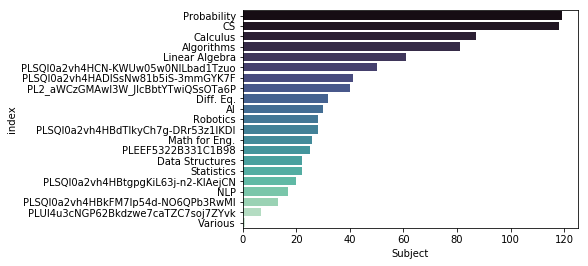

In [14]:
sns.barplot(x='Subject', y='index', data=subject_counts, palette='mako')

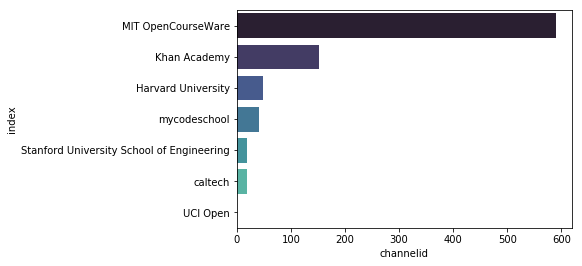

In [15]:
chan_cnt = lectures.channelid.value_counts().reset_index()
sns.barplot(x='channelid',y='index',data=chan_cnt, palette='mako')

In [16]:
lectures.isnull().sum()

lecture_title     0
lecture_text      0
title             0
description      17
channelid         0
playlist_id       0
vidid             0
Subject           0
dtype: int64

In [17]:
#correct description for harvard CS50 lectures
lectures['description'] = np.where(pd.isnull(lectures.description) == True,'HAR_CS50',lectures.description)

In [18]:
lectures

,lecture_title,lecture_text,title,description,channelid,playlist_id,vidid,Subject
0,"Lec39_MIT18.01SingleVariableCalculus,Fall2007-...",The following content is\nprovided under a Cre...,"Lec 39 | MIT 18.01 Single Variable Calculus, F...",Lecture 39: Final review\nInstructor: David Je...,MIT OpenCourseWare,PL590CCC2BC5AF3BC1,--lPz7VFnKI,Calculus
1,S01.0MathematicalBackgroundOverview--630YTQEuC...,"In this sequence of segments,\nwe review some ...",S01.0 Mathematical Background Overview,"MIT RES.6-012 Introduction to Probability, Spr...",MIT OpenCourseWare,PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6,-630YTQEuCI,Probability
2,8.ObjectOrientedProgramming--DP1i2ZU9gk.en.csv,The following content is\nprovided under a Cre...,8. Object Oriented Programming,MIT 6.0001 Introduction to Computer Science an...,MIT OpenCourseWare,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,-DP1i2ZU9gk,CS
3,Recitation9b-DNASequenceMatching--DwGrJ8JxDc.e...,The following\ncontent is provided under a Cre...,Recitation 9b: DNA Sequence Matching,"MIT 6.006 Introduction to Algorithms, Fall 201...",MIT OpenCourseWare,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,-DwGrJ8JxDc,Algorithms
4,R10.Quiz1Review--FElVPKykgw.en.csv,The following\ncontent is provided under a Cre...,R10. Quiz 1 Review,"MIT 6.006 Introduction to Algorithms, Fall 201...",MIT OpenCourseWare,PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb,-FElVPKykgw,Algorithms
5,"Lec15_MIT18.01SingleVariableCalculus,Fall2007-...",The following content is\nprovided under a Cre...,"Lec 15 | MIT 18.01 Single Variable Calculus, F...","Lecture 15: Differentials, antiderivatives\nVi...",MIT OpenCourseWare,PL590CCC2BC5AF3BC1,-MI0b4h3rS0,Calculus
6,R6.GreedyAlgorithms--QcPo_DWJk4.en.csv,The following content is\nprovided under a Cre...,R6. Greedy Algorithms,"MIT 6.046J Design and Analysis of Algorithms, ...",MIT OpenCourseWare,PLUl4u3cNGP6317WaSNfmCvGym2ucw3oGp,-QcPo_DWJk4,Algorithms
7,LUDecomposition--eA2D_rIcNA.en.csv,BEN HARRIS: Hi. I'm Ben. Today we are going to...,LU Decomposition,"MIT 18.06SC Linear Algebra, Fall 2011\nView th...",MIT OpenCourseWare,PL221E2BBF13BECF6C,-eA2D_rIcNA,Linear Algebra
8,StringManipulations--jjUoTiaSHw.en.csv,The following content is\nprovided under a Cre...,String Manipulations,MIT 6.0001 Introduction to Computer Science an...,MIT OpenCourseWare,PLUl4u3cNGP63WbdFxL8giv4yhgdMGaZNA,-jjUoTiaSHw,CS
9,L04.2TheCountingPrinciple--k8WU-KB0rk.en.csv,In this segment we introduce a\nsimple but pow...,L04.2 The Counting Principle,"MIT RES.6-012 Introduction to Probability, Spr...",MIT OpenCourseWare,PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6,-k8WU-KB0rk,Probability


## Cleaning, tokenizing the text
    - The text is pretty messy
    - we need to clean it up a bit.
    we do a clean up for the doc2vec model and another for the tfidf model

This intro is tricky as the '\n's are not always in the same spot, so we can't use regex. My preference is to remove the first 300 characters of each lecture. Not all of the lectures start with a long intro like the MIT lectures, however this approach should not affect the integry of any one lecture's content.

In [19]:
lectures.head(2)

,lecture_title,lecture_text,title,description,channelid,playlist_id,vidid,Subject
0,"Lec39_MIT18.01SingleVariableCalculus,Fall2007-...",The following content is\nprovided under a Cre...,"Lec 39 | MIT 18.01 Single Variable Calculus, F...",Lecture 39: Final review\nInstructor: David Je...,MIT OpenCourseWare,PL590CCC2BC5AF3BC1,--lPz7VFnKI,Calculus
1,S01.0MathematicalBackgroundOverview--630YTQEuC...,"In this sequence of segments,\nwe review some ...",S01.0 Mathematical Background Overview,"MIT RES.6-012 Introduction to Probability, Spr...",MIT OpenCourseWare,PLUl4u3cNGP60hI9ATjSFgLZpbNJ7myAg6,-630YTQEuCI,Probability


In [20]:
#for the doc2vec model, we wont remove the stop words

def make_d2v_data(lectures):
    clean_lectures = []
    #iterate over the text by lecture
    for lecture in lectures:
        #skip intro
        lecture = lecture[295:]
        #tokenize punctuation
        for key, token in punt_dict.items():
            lecture = lecture.replace(key, ' {} '.format(token))
        #expand contractions
        for key, expan in contract_dict.items():
            lecture = lecture.replace(key, ' {} '.format(expan))
        #append clean lecture to list of lectures
        clean_lectures.append(lecture)        
    return clean_lectures
        

In [23]:
orig_text = pd.read_csv('all_lectures.csv')
d2v_df = pd.read_csv('all_lecture_text.csv')

In [24]:
new_df = pd.concat([orig_text.reset_index(drop=True),d2v_df],axis=1)

In [25]:
new_df.isnull().sum().sum()

69

In [26]:
new = pd.DataFrame()
new['text'] = orig_text.lecture_text
new['label'] = d2v_df.Subject
new.dropna(inplace=True)
new.head()

,text,label
0,The following content is\nprovided under a Cre...,Calculus
1,"In this sequence of segments,\nwe review some ...",Probability
2,The following content is\nprovided under a Cre...,CS
3,The following\ncontent is provided under a Cre...,Algorithms
4,The following\ncontent is provided under a Cre...,Algorithms


In [27]:
new.isnull().sum()

text     0
label    0
dtype: int64

In [28]:
new.shape

(860, 2)

In [29]:
new.to_csv('raw_text.csv',index=False)